## Copy Op (for `RandomAccessibleInterval`s)

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@df84528

This notebook looks at copying `RandomAccessibleInterval`s. This `Op` exists for the times that `copy.img()` just doesn't work:

In [2]:
ij.op().help("copy.rai")

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.copy.CopyRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)

We need to get a `RandomAccessibleInterval`, or something that extends it, so we will create a [`StackView`](../transform/stackView.ipynb) from two [`equation`](../image/equation.ipynb) images, since `StackView` extends `RandomAccessibleInterval` but **not** `Img`.

true
false
false


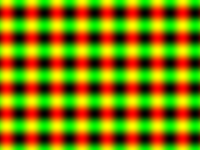

In [3]:
import net.imglib2.FinalInterval
import net.imglib2.img.Img
import net.imglib2.IterableInterval
import net.imglib2.RandomAccessibleInterval
import net.imglib2.type.numeric.integer.UnsignedByteType
import net.imglib2.view.Views

dims = new FinalInterval(200, 150)

input1 = ij.op().create().img(dims, new UnsignedByteType())
equation1 = "127 * Math.sin(p[0] / 4) + 128"
ij.op().run("equation", input1, equation1)
input2 = ij.op().create().img(dims, new UnsignedByteType())
equation2 = "127 * Math.cos(p[1] / 4) + 128"
ij.op().run("equation", input2, equation2)

stack = Views.stack(input1, input2)

println(stack instanceof RandomAccessibleInterval)
println(stack instanceof IterableInterval)
println(stack instanceof Img)

ij.notebook().display(stack)

Copying the `Img` is easy enough. All we need is the input we just made and an output image:

In [4]:
//Remember that output comes before input
copyRAI = ij.op().copy().rai(stack)

ij.notebook().display(copyRAI)

java.lang.ClassCastException:  net.imglib2.view.StackView cannot be cast to net.imglib2.IterableInterval

There also exist `Op`s to copy [`Img`s](img.ipynb) and [`IterableIntervals`](iterableInterval.ipynb), which you can find by accessing these links.